In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
path = "/content/Social_Network - Social_Network.csv"
df = pd.read_csv(path)
df

Mounted at /content/drive


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [ ]:
df.dropna(inplace = True)

In [ ]:
# a. Use the columns: 'Gender', 'Age', 'EstimatedSalary' as the independent variables
x=df.iloc[:, 2:4].values
print(x[0:10])

[[   26 43000]
 [   27 57000]
 [   27 84000]
 [   35 65000]
 [   26 80000]
 [   26 52000]
 [   21 16000]
 [   28 44000]
 [   33 28000]
 [   26 72000]]


In [ ]:
# b. Use the target variable as 'Purchased' (Yes-Y, No-N)
df['Purchased']= df['Purchased'].replace({'Y':1, 'N':0})
df['Purchased']

0       No
1       No
2       No
3       No
4       No
      ... 
395    Yes
396    Yes
397    Yes
398    Yes
399    Yes
Name: Purchased, Length: 400, dtype: object

In [ ]:
# c. Encode the categorical value of the target column to numerical value
y = df.iloc[:, -1].values
print(y[0:10])


['No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No']


In [ ]:
# d. Divide the data into training (75%) and testing set (25%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
print(x_train)

[[    30  79000]
 [    49  89000]
 [    35  53000]
 [    22  63000]
 [    46  96000]
 [    47 107000]
 [    34  72000]
 [    38  71000]
 [    48 138000]
 [    38  61000]
 [    37  57000]
 [    57  60000]
 [    44  39000]
 [    38  51000]
 [    28  79000]
 [    35  60000]
 [    54  26000]
 [    35  75000]
 [    23  63000]
 [    47  34000]
 [    29  83000]
 [    21  72000]
 [    60  34000]
 [    49  65000]
 [    35  91000]
 [    34  25000]
 [    41  72000]
 [    33  51000]
 [    48  30000]
 [    51  23000]
 [    49  36000]
 [    52  38000]
 [    46 117000]
 [    45 131000]
 [    42 149000]
 [    59  88000]
 [    59  42000]
 [    25  33000]
 [    46  74000]
 [    36 118000]
 [    27  54000]
 [    22  81000]
 [    37  80000]
 [    31  74000]
 [    38  50000]
 [    41  51000]
 [    39  79000]
 [    26  72000]
 [    30  87000]
 [    24  32000]
 [    49  88000]
 [    26  43000]
 [    35  57000]
 [    35  59000]
 [    29  43000]
 [    47  20000]
 [    29  47000]
 [    29  28000]
 [    24  5800

In [ ]:
# e. Perform the classification with K=3
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


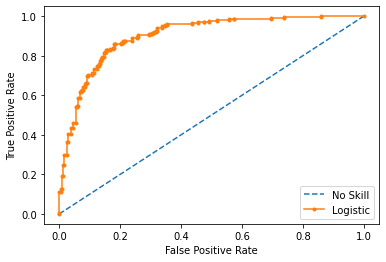

In [ ]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [ ]:
# f. Analyse the performance of the classifier with various performance measures such as
# confusion matrix, accuracy, recall, precision, specificity, f-score, Receiver operating
# characteristic (ROC) curve and Area Under Curve (AUC) score. g. Perform feature scaling on independent variables and analyse the performance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler

# generate some example data
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# perform feature scaling on the independent variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train a logistic regression classifier
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

# calculate the recall
recall = recall_score(y_test, y_pred)

# calculate the precision
precision = precision_score(y_test, y_pred)

# calculate the specificity
specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])

f_score = 2 * (precision * recall) / (precision + recall)

fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
auc_score = auc(fpr, tpr)

print("Confusion Matrix:\n", cm)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("Specificity:", specificity)
print("F-score:", f_score)
print("AUC score:", auc_score)



Confusion Matrix:
 [[75 14]
 [20 91]]
Accuracy: 0.83
Recall: 0.8198198198198198
Precision: 0.8666666666666667
Specificity: 0.8426966292134831
F-score: 0.8425925925925926
AUC score: 0.9126429800587104


In [ ]:
# h. Change the value of K in KNN with 5,7,9,11 and tabulate the various TP, TN, accuracy, f-score and AUC score obtained. K value TP TN Accuracy f-score AUC score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


k_values = [5, 7, 9, 11]

tp_list = []
tn_list = []
accuracy_list = []
f_score_list = []
auc_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    tp_list.append(tp)
    tn_list.append(tn)
    accuracy_list.append(accuracy_score(y_test, y_pred))
    f_score_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_pred))
    
print("K value\tTP\tTN\tAccuracy\tF-score\tAUC score")
for i in range(len(k_values)):
    print(f"{k_values[i]}\t{tp_list[i]}\t{tn_list[i]}\t{accuracy_list[i]:.2f}\t{f_score_list[i]:.2f}\t{auc_list[i]:.2f}")


K value	TP	TN	Accuracy	F-score	AUC score
5	80	82	0.81	0.81	0.81
7	81	81	0.81	0.81	0.81
9	81	79	0.80	0.80	0.80
11	81	82	0.81	0.81	0.82


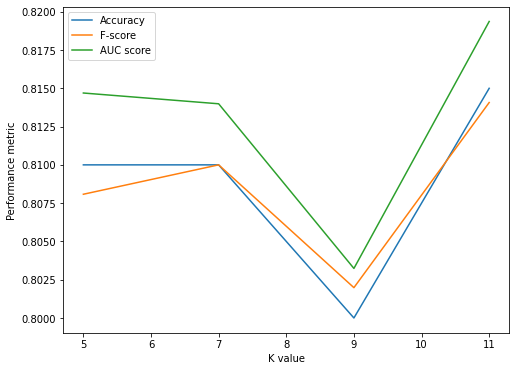

Maximum accuracy: 0.81 (K=11)
Maximum F-score: 0.81 (K=11)
Maximum AUC score: 0.82 (K=11)


In [ ]:
# i. Analyse for which K value, the classification algorithm provides better performance.
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_list, label='Accuracy')
plt.plot(k_values, f_score_list, label='F-score')
plt.plot(k_values, auc_list, label='AUC score')
plt.legend()
plt.xlabel('K value')
plt.ylabel('Performance metric')
plt.show()
max_accuracy = max(accuracy_list)
max_accuracy_k = k_values[accuracy_list.index(max_accuracy)]
print(f"Maximum accuracy: {max_accuracy:.2f} (K={max_accuracy_k})")

max_f_score = max(f_score_list)
max_f_score_k = k_values[f_score_list.index(max_f_score)]
print(f"Maximum F-score: {max_f_score:.2f} (K={max_f_score_k})")

max_auc = max(auc_list)
max_auc_k = k_values[auc_list.index(max_auc)]
print(f"Maximum AUC score: {max_auc:.2f} (K={max_auc_k})")
